# Credit card fraud detection

In [1]:
import pandas as pd
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### The distribution of genuine and fraudulent transactions

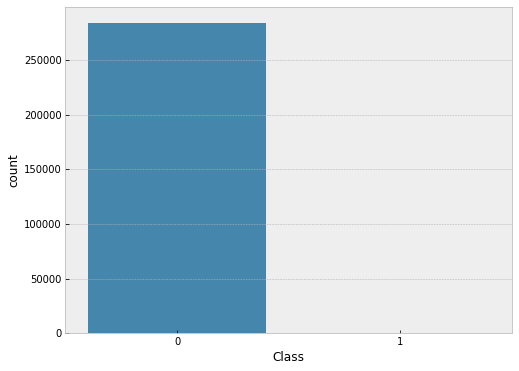

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.style.use('bmh')
sns.countplot(x='Class', data=dataset)
plt.show()

### The distribution of fraudulent and genuine transactions based on time

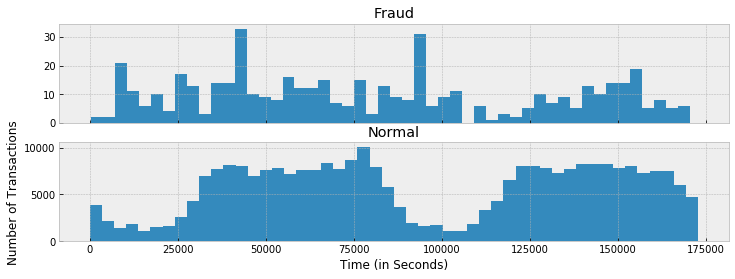

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50
ax1.hist(dataset.Time[dataset.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(dataset.Time[dataset.Class == 0], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

### The distribution of fraudulent and genuine transactions based on amounts

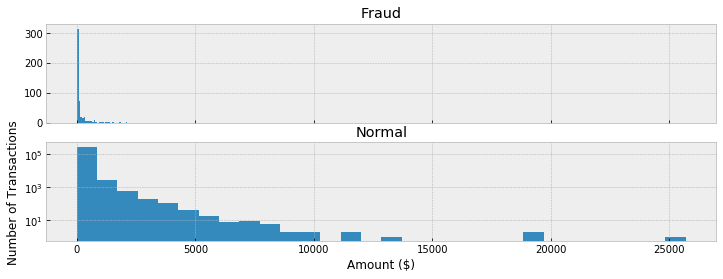

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 30
ax1.hist(dataset.Amount[dataset.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(dataset.Amount[dataset.Class == 0], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

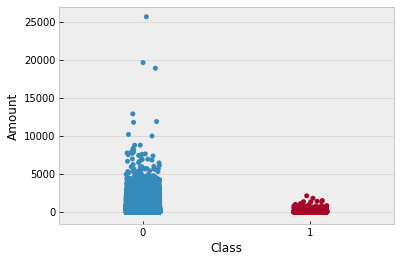

In [9]:
import seaborn as sns
ax = sns.stripplot(x=dataset.Class, y=dataset.Amount, data= dataset, jitter=True)
plt.show()

In [37]:
dataset['TimeGroup'] =(dataset.Time.astype('float')/3600).round(decimals=0)
dataset.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TimeGroup
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,48.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,48.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,48.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,48.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,48.0


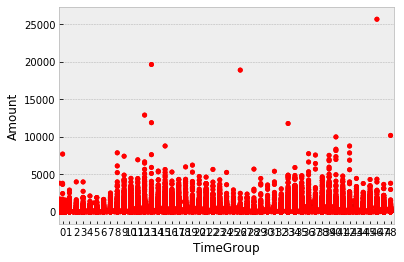

In [56]:
import seaborn as sns
#f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
#ax0 = sns.regplot(x=dataset.TimeGroup.astype(int), y=dataset.Amount[dataset.Class == 1],
#                    palette="Set2", data= dataset, jitter=True)
#ax1 = sns.regplot(x=dataset.TimeGroup.astype(int), y=dataset.Amount[dataset.Class == 0], 
#                    palette="Set2", data= dataset, jitter=True)
#ax1 = sns.stripplot(x=dataset.Class, y=dataset.Amount, data= dataset, jitter=True)
ax0 = sns.swarmplot(x=dataset.TimeGroup.astype(int), y=dataset.Amount[dataset.Class == 1], data=dataset, color = 'red')
plt.show()

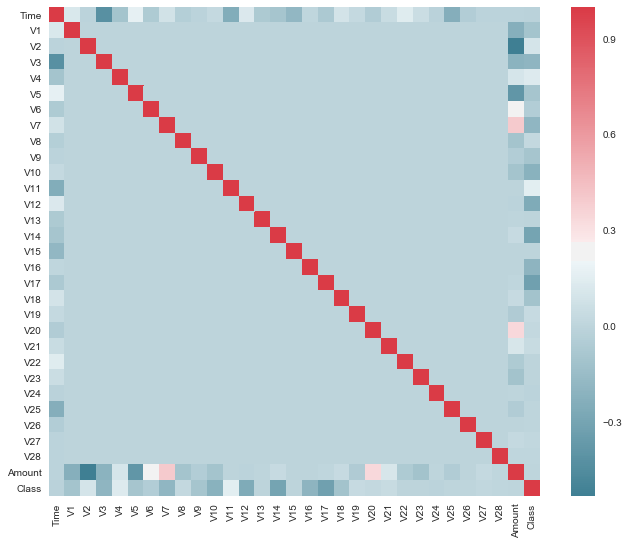

In [17]:
import seaborn as sns
sns.set(style="white")
corr = dataset.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Normalize Amount in the data set

In [2]:
from sklearn.preprocessing import StandardScaler

dataset['normAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
datasetNew = dataset.drop(['Time','Amount'],axis=1)
datasetNew.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### The data is imbalanced so it must be up or down sampled.

In [9]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score,classification_report
from imblearn.combine import SMOTETomek 
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from time import time
def HyperParam(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
    smote = SMOTETomek(random_state = 0)
    #smote = SMOTEENN(random_state = 0)
    pipeline = Pipeline([
               ('smote', smote),
               ('clf', RandomForestClassifier()),
                ])

    parameters = {
              'clf__n_estimators': (10, 15, 20),
             }

    gs_clf = GridSearchCV(estimator=pipeline, param_grid=parameters, 
                          n_jobs=-1, verbose=1, cv = 5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    print(parameters)
    t0 = time()
    gs_clf.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % gs_clf.best_score_)
    print("Best parameters set:")
    best_parameters = gs_clf.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
        #### Cross-validation to check the test set error rate
    scores = cross_val_score(gs_clf, X_train, y_train, scoring='neg_mean_absolute_error')
    print(scores)
    
    
    ## Predicting the test set results
    y_pred = gs_clf.predict(X_test)
    
    print("The accuracy score of {0}".format(accuracy_score(y_test, y_pred)))
    print ('Confusion Matrix:')
    print (confusion_matrix(y_test, y_pred))
    print (accuracy_score(y_test, y_pred))
    print (classification_report(y_test, y_pred))
    return y_test, y_pred, X_train

### Random Forest 

In [5]:
X = datasetNew.drop(['Class'], axis = 1)
y = datasetNew[['Class']].copy()
y_ov_test, y_ov_pred, X_train = HyperParam(X,y)

Performing grid search...
('pipeline:', ['smote', 'clf'])
parameters:
{'clf__n_estimators': (10, 15, 20)}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/mojtaba/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mojtaba/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mojtaba/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mojtaba/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

done in 1163.549s
()
Best score: 0.999
Best parameters set:
	clf__n_estimators: 20
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.8min finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.5min finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.0min finished


[-0.00049658 -0.00054172 -0.00045144]
The accuracy score of 0.999531851644
Confusion Matrix:
[[85285    11]
 [   29   118]]
0.9995318516437859
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.91      0.80      0.86       147

avg / total       1.00      1.00      1.00     85443



### Feature selection with RF

In [11]:
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X,y)
data_features = datasetNew.drop(['Class'], axis = 1)
feature_selected = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_selected)

/Users/mojtaba/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


V17           0.184706
V12           0.144249
V14           0.098721
V16           0.073262
V10           0.068940
V11           0.066650
V9            0.043969
V4            0.029460
V18           0.025459
V7            0.022572
V26           0.021195
V21           0.020887
V3            0.018926
V1            0.015307
V6            0.014656
V27           0.012698
V19           0.012492
V20           0.012392
V8            0.011911
normAmount    0.011866
V2            0.011808
V13           0.011247
V28           0.010866
V5            0.010128
V15           0.010084
V22           0.010043
V25           0.009346
V24           0.008509
V23           0.007652
dtype: float64


### SGD Classifier

In [14]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score,classification_report
from imblearn.combine import SMOTETomek 
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from time import time
from sklearn.linear_model import SGDClassifier
def HyperParam_sgd(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
    smote = SMOTETomek(random_state = 0)
    #smote = SMOTEENN(random_state = 0)
    pipeline = Pipeline([
               ('smote', smote),
               ('clf', SGDClassifier(max_iter=1000, tol = 0)),
                ])

    parameters = {
              'clf__loss': ('log','modified_huber','hinge'),
              'clf__penalty':('l2','elasticnet'),
              'clf__alpha': (0.00001, 0.000001),
              'clf__class_weight': (None, 'balanced'),
             }

    gs_clf = GridSearchCV(estimator=pipeline, param_grid=parameters, 
                          n_jobs=-1, verbose=1, cv = 5)
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    print(parameters)
    t0 = time()
    gs_clf.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % gs_clf.best_score_)
    print("Best parameters set:")
    best_parameters = gs_clf.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
        #### Cross-validation to check the test set error rate
    scores = cross_val_score(gs_clf, X_train, y_train, scoring='neg_mean_absolute_error')
    print(scores)
    
    
    ## Predicting the test set results
    y_pred = gs_clf.predict(X_test)
    
    print("The accuracy score of {0}".format(accuracy_score(y_test, y_pred)))
    print ('Confusion Matrix:')
    print (confusion_matrix(y_test, y_pred))
    print (accuracy_score(y_test, y_pred))
    print (classification_report(y_test, y_pred))
    return y_test, y_pred, X_train

In [ ]:
X = datasetNew.drop(['Class'], axis = 1)
y = datasetNew[['Class']].copy()
y_sgd_test, y_sgd_pred, X_train = HyperParam_sgd(X,y)

Performing grid search...
('pipeline:', ['smote', 'clf'])
parameters:
{'clf__penalty': ('l2', 'elasticnet'), 'clf__loss': ('log', 'modified_huber', 'hinge'), 'clf__class_weight': (None, 'balanced'), 'clf__alpha': (1e-05, 1e-06)}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
